<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# Machine Learning in Finance Lab

## Final Group Project ##


* Yu-Ching Liao <ycliao3@illinois.edu>

# Basic Import and Definition

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import warnings
import sklearn as sk
import numpy as np
warnings.filterwarnings("ignore")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

In [9]:
df2 = pd.read_csv(
    'MLF_GP2_EconCycle.csv',
    index_col="Date"
)
df2.index = pd.to_datetime(df2.index)

In [10]:
df2

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
Date,,,,,,,,,,,,,,,,
1979-01-31,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1979-02-28,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
1979-03-31,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
1979-04-30,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
1979-05-31,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-03-31,5.80,6.22,6.38,6.54,6.65,6.69,5.61,5.71,5.79,0.967241,0.984483,0.998276,78.26,0.010095,0.019861,0.029813
1997-04-30,5.99,6.45,6.61,6.76,6.86,6.89,5.61,5.69,5.78,0.936561,0.949917,0.964942,78.56,0.008274,0.019316,0.028593
1997-05-31,5.87,6.28,6.42,6.57,6.66,6.71,5.60,5.65,5.69,0.954003,0.962521,0.969336,78.76,0.009142,0.019879,0.028379


# 1) Introduction/Exploratory Data Analysis,
## Scatter Matrix

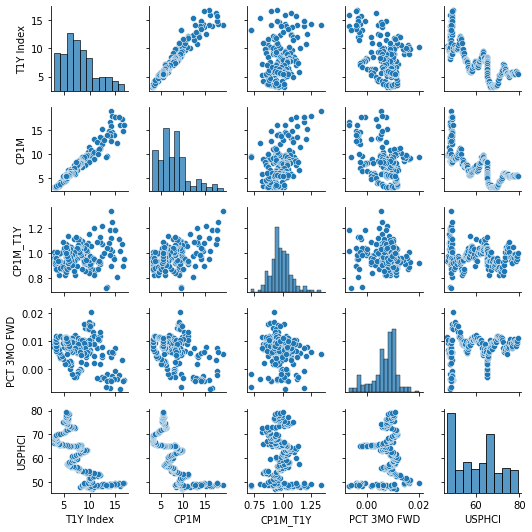

In [11]:
cols = ['T1Y Index', "CP1M", "CP1M_T1Y", "PCT 3MO FWD", 'USPHCI']
sns.pairplot(df2[cols], size = 1.5)
plt.tight_layout()
plt.show()

## Print the Shape Out  

In [12]:
labels = list(df2.columns)
n_column = len(labels)
n_row = len(df2)

print("The number of Columns is", str(n_column)+".")
print("The number of Rows is", str(n_row)+".")

The number of Columns is 16.
The number of Rows is 223.


## Print the nature out 

In [13]:
nl = []
sl = []
ol = []

for label in labels:
    Number = 0
    String = 0
    Other = 0

    for i in df2[label]:
        if type(i) == str:
            String += 1
        elif (type(i) == int) or (type(i) == float):
            Number += 1
        else:
            Other += 1
    nl.append(Number)
    sl.append(String)
    ol.append(Other)

Output = {
    "Label": labels,
    "Number": nl,
    "String": sl,
    "Other": ol
}
Output = pd.DataFrame(Output)
Output

,Label,Number,String,Other
0,T1Y Index,223,0,0
1,T2Y Index,223,0,0
2,T3Y Index,223,0,0
3,T5Y Index,223,0,0
4,T7Y Index,223,0,0
5,T10Y Index,223,0,0
6,CP1M,223,0,0
7,CP3M,223,0,0
8,CP6M,223,0,0
9,CP1M_T1Y,223,0,0


## Summary of Statistics 

In [14]:
numer = np.array(df2['USPHCI'])

#Mean, Var and Std
print('μ =', numer.mean(), 'Var =', numer.var(), "σ =", numer.std(),'\n')

#quantiles
def q(ds, n_q):
    result = []
    for i in range(n_q+1):
        result.append(np.percentile(ds, i*(100)/n_q))
    return result
print("Boundaries for 4 Equal Percentiles\n",q(numer, 4), "\n")

#10 equal percenetiles
print("Boundaries for 10 Equal Percentiles\n",q(numer, 10), "\n")

#catagorical analysis
cat = list(df2.columns)
neat_cat = list(set(cat))
print("Unique Label Values \n", neat_cat)

#count catagorics 
counts = []
for i in neat_cat:
    counts.append(sum(df2.columns == i))
Output = {
    "Types" : neat_cat,
    "Counts" : counts
}
Output = pd.DataFrame(Output)
Output = Output.set_index("Types")
Output = Output.transpose()
Output

μ = 60.59466367713005 Var = 90.07907242051922 σ = 9.490999548020179 

Boundaries for 4 Equal Percentiles
 [47.08, 50.370000000000005, 61.09, 67.005, 79.21] 

Boundaries for 10 Equal Percentiles
 [47.08, 48.598000000000006, 49.266, 53.12, 56.724000000000004, 61.09, 64.96600000000001, 65.55799999999999, 69.302, 74.33200000000001, 79.21] 

Unique Label Values 
 ['CP1M_T1Y', 'CP1M', 'T7Y Index', 'CP6M', 'T5Y Index', 'T1Y Index', 'PCT 9MO FWD', 'CP6M_T1Y', 'T3Y Index', 'PCT 3MO FWD', 'T2Y Index', 'CP3M', 'CP3M_T1Y', 'T10Y Index', 'USPHCI', 'PCT 6MO FWD']


Types,CP1M_T1Y,CP1M,T7Y Index,CP6M,T5Y Index,T1Y Index,PCT 9MO FWD,CP6M_T1Y,T3Y Index,PCT 3MO FWD,T2Y Index,CP3M,CP3M_T1Y,T10Y Index,USPHCI,PCT 6MO FWD
Counts,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## QQ PLot 

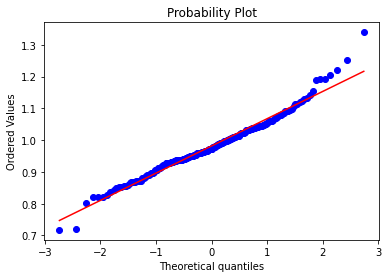

P-Value: 8.424094272178417e-05
Reject H0: Client_Trade_Percentage is Normally distributed.


In [15]:
stats.probplot(df2['CP1M_T1Y'], dist="norm", plot=pylab)
pylab.show()
print("P-Value:", stats.normaltest(df2['CP1M_T1Y'])[1])
print("Reject H0: Client_Trade_Percentage is Normally distributed.")

## Print Summary of Data

In [16]:
summary = df2.describe()
print(summary)

        T1Y Index   T2Y Index   T3Y Index   T5Y Index   T7Y Index  T10Y Index  \
count  223.000000  223.000000  223.000000  223.000000  223.000000  223.000000   
mean     8.030717    8.410673    8.563587    8.808655    8.979776    9.073498   
std      3.158575    2.954431    2.820405    2.647742    2.542686    2.447525   
min      3.180000    3.840000    4.170000    4.710000    5.050000    5.330000   
25%      5.735000    6.180000    6.410000    6.695000    6.965000    7.175000   
50%      7.670000    8.000000    8.130000    8.330000    8.520000    8.610000   
75%      9.840000   10.075000   10.375000   10.525000   10.640000   10.685000   
max     16.720000   16.460000   16.220000   15.930000   15.650000   15.320000   

             CP1M        CP3M        CP6M    CP1M_T1Y    CP3M_T1Y    CP6M_T1Y  \
count  223.000000  223.000000  223.000000  223.000000  223.000000  223.000000   
mean     7.942197    7.936906    7.892780    0.981765    0.983524    0.982666   
std      3.405098    3.3293

## Plot Data 

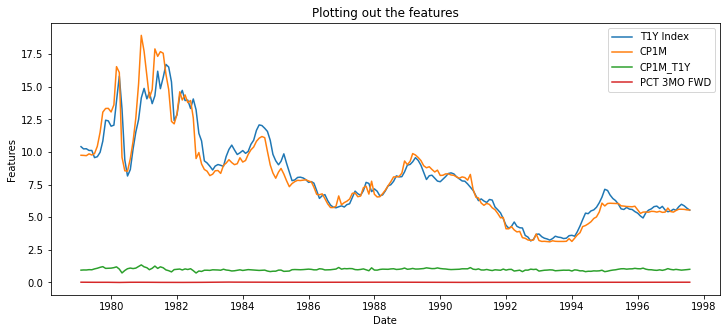

In [17]:
plt.figure(figsize=[12, 5])
plt.plot(df2[['T1Y Index', "CP1M", "CP1M_T1Y", "PCT 3MO FWD"]],
         label=['T1Y Index', "CP1M", "CP1M_T1Y", "PCT 3MO FWD"])
plt.xlabel('Date')
plt.ylabel('Features')
plt.title('Plotting out the features')
plt.legend()
plt.show()

## Cross Plotting Pairs of Attributes (Scatter Plot) 

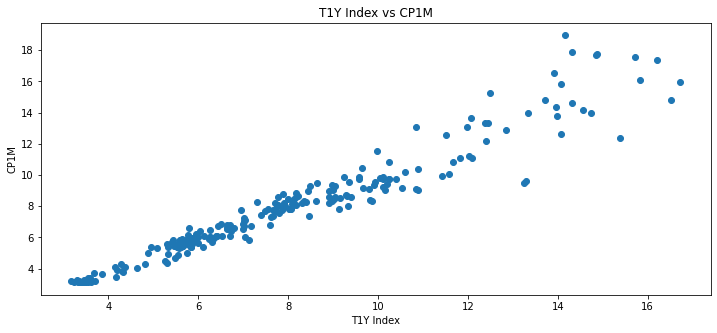

In [18]:
plt.figure(figsize=[12,5])
plt.scatter(df2['T1Y Index'], df2["CP1M"])
plt.title("T1Y Index vs CP1M")
plt.xlabel('T1Y Index')
plt.ylabel('CP1M')
plt.show()

## Correlation

In [19]:
df2.corr()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
T1Y Index,1.000000,0.992299,0.981237,0.961512,0.946299,0.934787,0.962917,0.967800,0.973094,0.213583,0.158550,0.006001,-0.771879,-0.407624,-0.460467,-0.488882
T2Y Index,0.992299,1.000000,0.997306,0.986983,0.977260,0.968840,0.938417,0.945139,0.954145,0.147634,0.094849,-0.046372,-0.786831,-0.382981,-0.428199,-0.448940
T3Y Index,0.981237,0.997306,1.000000,0.995546,0.989145,0.982837,0.919866,0.927224,0.937839,0.113604,0.062140,-0.072444,-0.790018,-0.368031,-0.409257,-0.427909
T5Y Index,0.961512,0.986983,0.995546,1.000000,0.998315,0.995331,0.890890,0.899064,0.911446,0.066948,0.017599,-0.108187,-0.802284,-0.351309,-0.386366,-0.400488
T7Y Index,0.946299,0.977260,0.989145,0.998315,1.000000,0.999073,0.872348,0.880997,0.894304,0.049383,0.001674,-0.119328,-0.811539,-0.336880,-0.368737,-0.380166
T10Y Index,0.934787,0.968840,0.982837,0.995331,0.999073,1.000000,0.859418,0.868233,0.881913,0.038051,-0.008190,-0.125453,-0.818440,-0.327772,-0.357288,-0.367086
CP1M,0.962917,0.938417,0.919866,0.890890,0.872348,0.859418,1.000000,0.998414,0.993353,0.453449,0.398043,0.233306,-0.734319,-0.404970,-0.481658,-0.525706
CP3M,0.967800,0.945139,0.927224,0.899064,0.880997,0.868233,0.998414,1.000000,0.997961,0.431575,0.388461,0.235302,-0.741016,-0.402216,-0.478063,-0.520682
CP6M,0.973094,0.954145,0.937839,0.911446,0.894304,0.881913,0.993353,0.997961,1.000000,0.398250,0.363720,0.224784,-0.750358,-0.395837,-0.469990,-0.511409
CP1M_T1Y,0.213583,0.147634,0.113604,0.066948,0.049383,0.038051,0.453449,0.431575,0.398250,1.000000,0.960934,0.842627,-0.137622,-0.151815,-0.245750,-0.309385


## Correlation Visualization

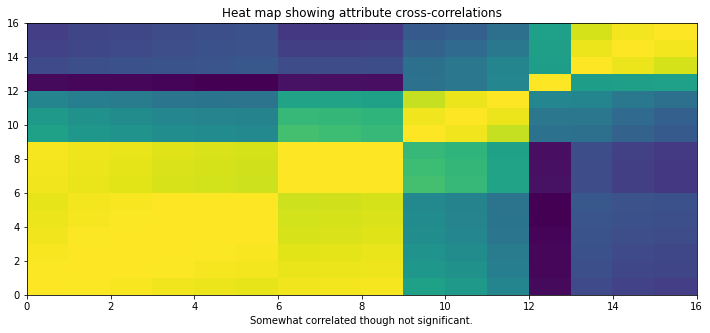

In [20]:
#calculate correlations between real-valued attributes
corMat = pd.DataFrame(df2.corr())
#visualize correlations using heatmap
plt.figure(figsize=[12,5])
plt.title("Heat map showing attribute cross‐correlations")
plt.pcolor(corMat)
plt.xlabel('Somewhat correlated though not significant.')
plt.show()

# 2) Preprocessing, feature extraction, feature selection,

## Drop Missing Value 

In [21]:
df2 = df2.dropna()

## Preprocessing the Data 

In [22]:
X = df2.drop(['USPHCI'], axis = 1)
y = df2['USPHCI']

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

y = y.array.reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)

## See Variance Ratio 

Explained Variance Ratio with all components:
 [9.55657070e-01 3.99135802e-02 3.35994699e-03 7.55389913e-04
 2.10423219e-04 3.81406915e-05 2.17681942e-05 1.74860869e-05
 1.41572298e-05 7.98034462e-06 2.33594094e-06 1.56298102e-06
 9.34359752e-08 5.51891546e-08 1.00610705e-08] 

Culmulative Variance Ratio with all components:
 [0.95565707 0.99557065 0.9989306  0.99968599 0.99989641 0.99993455
 0.99995632 0.9999738  0.99998796 0.99999594 0.99999828 0.99999984
 0.99999993 0.99999999 1.        ] 




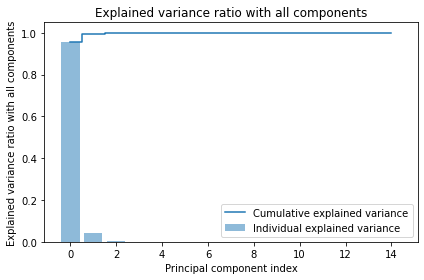

In [23]:
X = df2.drop(['USPHCI'], axis = 1)
before = PCA(n_components=len(X.columns))
before.fit_transform(X)
print("Explained Variance Ratio with all components:\n", before.explained_variance_ratio_, "\n")
print("Culmulative Variance Ratio with all components:\n", before.explained_variance_ratio_.cumsum(), "\n\n")

plt.bar(range(0,len(before.explained_variance_ratio_)), before.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(before.explained_variance_ratio_.cumsum())), before.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')

plt.title('Explained variance ratio with all components')
plt.ylabel('Explained variance ratio with all components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Explained Variance Ratio with 4 components:
 [9.55657070e-01 3.99135802e-02 3.35994699e-03 7.55389913e-04] 

Culmulative Variance Ratio with 4 components:
 [0.95565707 0.99557065 0.9989306  0.99968599]


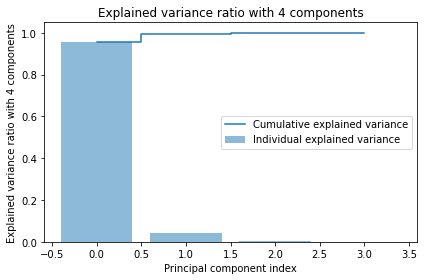

In [24]:
after = PCA(n_components=4)
after.fit_transform(X)
print("Explained Variance Ratio with 4 components:\n",after.explained_variance_ratio_, "\n")
print("Culmulative Variance Ratio with 4 components:\n", after.explained_variance_ratio_.cumsum())

plt.bar(range(0,len(after.explained_variance_ratio_)), after.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(after.explained_variance_ratio_.cumsum())), after.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')

plt.title('Explained variance ratio with 4 components')
plt.ylabel('Explained variance ratio with 4 components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Model fitting and evaluation, (you should fit at least 3 different machine learning models) & Hyperparameter tunning

## Simple Linear Regresion with PCA 

Coefficients:  [[-0.24109023 -0.09217819 -0.18879978 -0.18903653]]
Intercept:  [-0.004937]


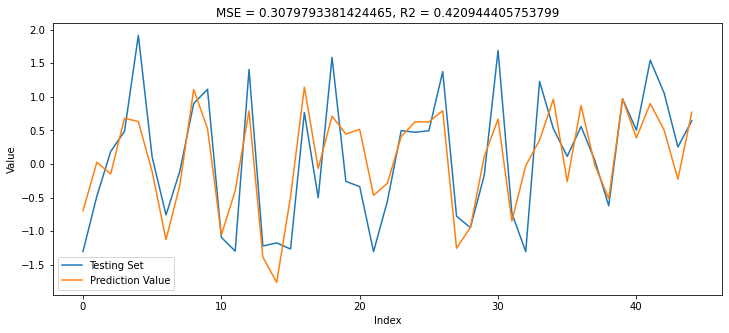

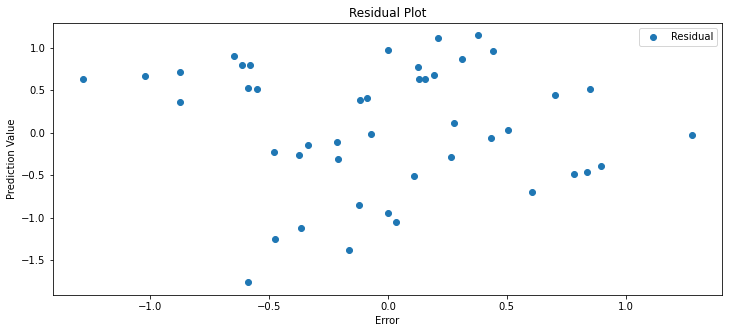

In [29]:
X = df2.drop(['USPHCI'], axis = 1)
y = df2['USPHCI']

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

y = y.array.reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)

#PCA
pca = PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

#Testing Set Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True) 

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

mse = MSE(y_pred, y_test)
r2 = R2(y_pred, y_test)
plt.figure(figsize=[12,5])
plt.plot(y_test, label = "Testing Set")
plt.plot(y_pred, label = "Prediction Value")
plt.legend()
plt.title("MSE = "+str(mse)+", R2 = "+str(r2))
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred - y_test,y_pred,  label = "Residual")
plt.xlabel("Error")
plt.ylabel("Prediction Value")
plt.title("Residual Plot")
plt.legend()
plt.show()

## Ridge Regression with Hyperparameter Tunning

α=  0 , R2=  0.7709315352061463 , MSE =  0.17110414461321527
α=  0.1 , R2=  0.7606253656128817 , MSE =  0.1664053287775124
α=  1.0 , R2=  0.6291381510053733 , MSE =  0.2084804119213952
α=  10.0 , R2=  0.5060668309520844 , MSE =  0.26135570870022196
α=  100.0 , R2=  0.37994266062846904 , MSE =  0.2918654056718467
α=  1000.0 , R2=  -1.2422537634035846 , MSE =  0.41568765881273323
α=  10000.0 , R2=  -77.32440611960723 , MSE =  0.7578752378476383


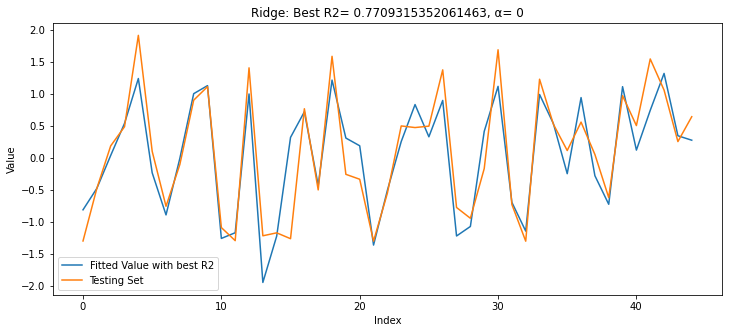

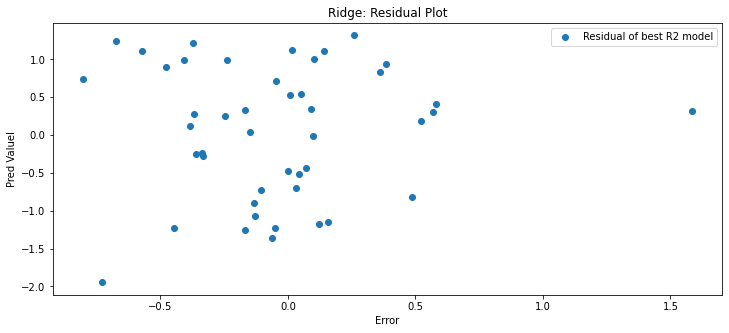

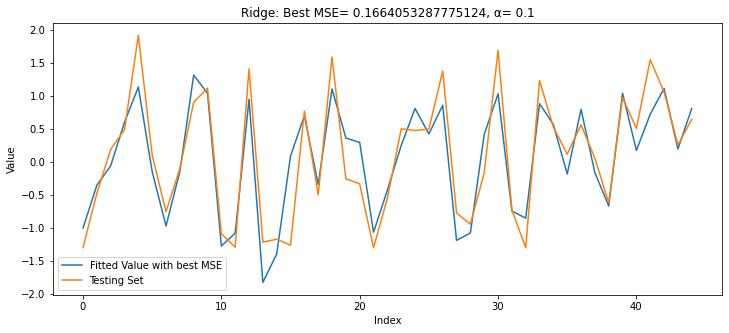

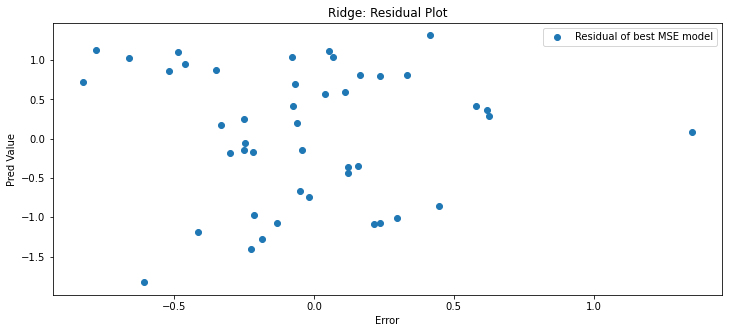

In [31]:
X = df2.drop(['USPHCI'], axis = 1)
y = df2['USPHCI']

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

y = y.array.reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)

#Testing Set Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True) 


alphas = [0, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

best_r2_ridge = -999999999
α_r2_ridge = 0
best_mse_ridge = 99999999
α_mse_ridge = 0

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Obtain R-squared
    y_pred = ridge.predict(X_test)
    
    r2 = R2(y_pred, y_test)
    mse = MSE(y_pred, y_test)
    
    if best_r2_ridge < r2:
        best_r2_ridge = r2
        α_r2_ridge = alpha
        
    if best_mse_ridge > mse:
        best_mse_ridge = mse
        α_mse_ridge = alpha
    
    print("α= ", alpha, ", R2= ", r2, ", MSE = ", mse)
ridge_r2 = Ridge(alpha=α_r2_ridge)
ridge_r2.fit(X_train, y_train)
y_pred_r2_ridge = ridge_r2.predict(X_test)

plt.figure(figsize=[12,5])
plt.plot(y_pred_r2_ridge, label = 'Fitted Value with best R2')
plt.plot(y_test, label = 'Testing Set')
plt.title("Ridge: Best R2= "+str(best_r2_ridge)+", α= "+str(α_r2_ridge))
plt.legend()
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred_r2_ridge - y_test, y_pred_r2_ridge, label = "Residual of best R2 model")
plt.xlabel("Error")
plt.ylabel("Pred Valuel")
plt.title("Ridge: Residual Plot")
plt.legend()
plt.show()

ridge_mse = Ridge(alpha=α_mse_ridge)
ridge_mse.fit(X_train, y_train)
y_pred_mse_ridge = ridge_mse.predict(X_test)

plt.figure(figsize=[12,5])
plt.plot(y_pred_mse_ridge, label = 'Fitted Value with best MSE')
plt.plot(y_test, label = 'Testing Set')
plt.title("Ridge: Best MSE= "+str(best_mse_ridge)+", α= "+str(α_mse_ridge))
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred_mse_ridge - y_test, y_pred_mse_ridge, label = "Residual of best MSE model")
plt.xlabel("Error")
plt.ylabel("Pred Value")
plt.title("Ridge: Residual Plot")
plt.legend()
plt.show()

## Lasso Regression with Hyperparameter tunning

α=  0 , R2=  0.7582808650411702 , MSE =  0.1924863927029166
α=  0.1 , R2=  0.3288151922141559 , MSE =  0.27584050295119744
α=  1.0 , R2=  -1.867853816152284e+34 , MSE =  0.8993388990664136
α=  10.0 , R2=  -1.867853816152284e+34 , MSE =  0.8993388990664136
α=  100.0 , R2=  -1.867853816152284e+34 , MSE =  0.8993388990664136
α=  1000.0 , R2=  -1.867853816152284e+34 , MSE =  0.8993388990664136
α=  10000.0 , R2=  -1.867853816152284e+34 , MSE =  0.8993388990664136


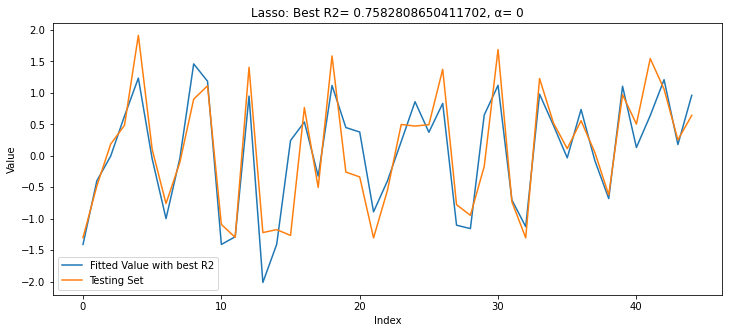

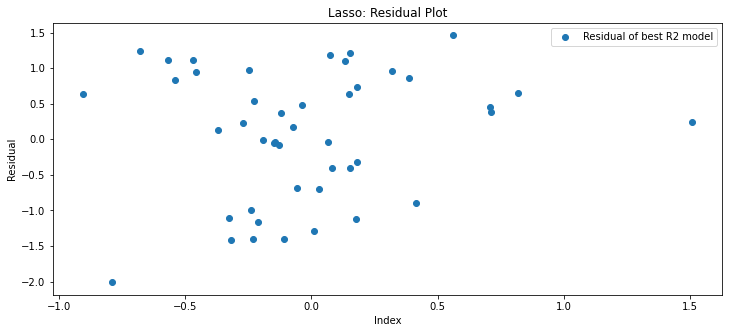

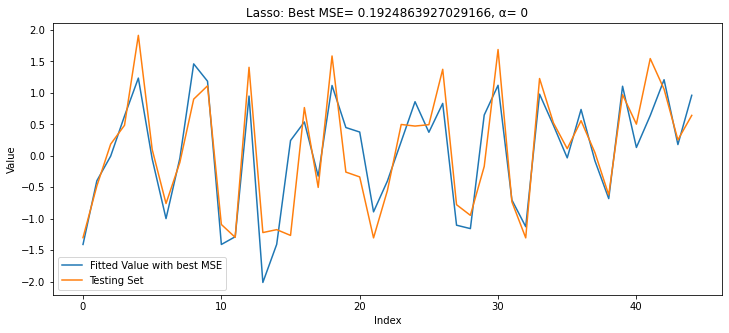

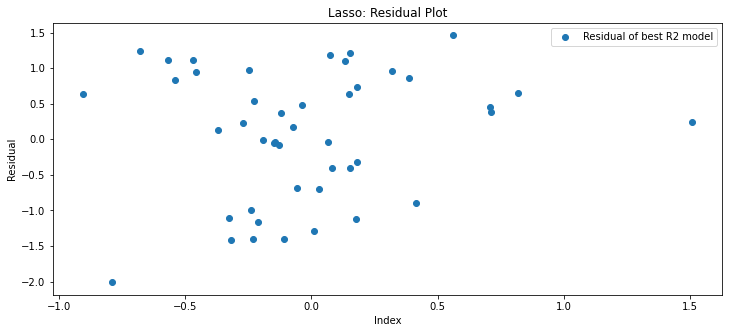

In [32]:
X = df2.drop(['USPHCI'], axis = 1)
y = df2['USPHCI']

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

y = y.array.reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)

#Testing Set Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True) 


alphas = [0, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
best_r2_lasso = -99999999
α_r2_lasso = 0
best_mse_lasso = 99999999
α_mse_lasso = 0

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)
    
    r2 = R2(y_pred, y_test)
    mse = MSE(y_pred, y_test)
    
    if best_r2_lasso < r2:
        best_r2_lasso = r2
        α_r2_lasso = alpha
        
    if best_mse_lasso > mse:
        best_mse_lasso = mse
        α_mse_lasso = alpha
    
    print("α= ", alpha, ", R2= ", r2, ", MSE = ", mse)
    
lasso_r2 = Lasso(alpha=α_r2_lasso)
lasso_r2.fit(X_train, y_train)
y_pred_r2_lasso = lasso_r2.predict(X_test)
y_pred_r2_lasso = y_pred_r2_lasso.reshape(-1,1)

plt.figure(figsize=[12,5])
plt.plot(y_pred_r2_lasso, label = 'Fitted Value with best R2')
plt.plot(y_test, label = 'Testing Set')
plt.title("Lasso: Best R2= "+str(best_r2_lasso)+", α= "+str(α_r2_lasso))
plt.legend()
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred_r2_lasso - y_test, y_pred_r2_lasso, label = "Residual of best R2 model")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Lasso: Residual Plot")
plt.legend()
plt.show()

lasso_mse = Lasso(alpha=α_mse_lasso)
lasso_mse.fit(X_train, y_train)
y_pred_mse_lasso = lasso_mse.predict(X_test)
y_pred_mse_lasso = y_pred_mse_lasso.reshape(-1,1)

plt.figure(figsize=[12,5])
plt.plot(y_pred_mse_lasso, label = 'Fitted Value with best MSE')
plt.plot(y_test, label = 'Testing Set')
plt.title("Lasso: Best MSE= "+str(best_mse_lasso)+", α= "+str(α_mse_lasso))
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=[12,5])
plt.scatter(y_pred_mse_lasso - y_test, y_pred_mse_lasso , label = "Residual of best R2 model")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Lasso: Residual Plot")
plt.legend()
plt.show()

# 5) Ensembling

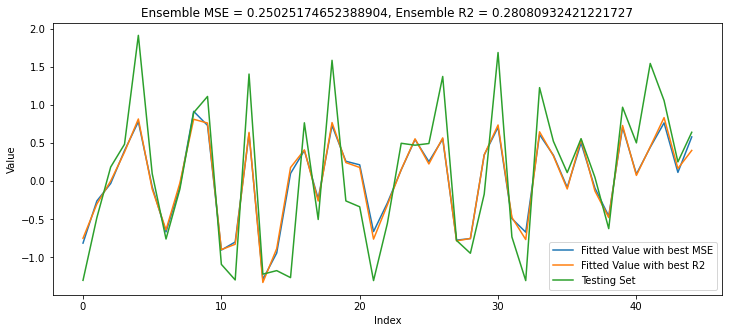

In [33]:
# Horizontally stack predictions and take the average across rows
y_pred = y_pred.reshape(-1, 1)
test_preds_mse = np.mean(np.hstack((y_pred, y_pred_mse_ridge, y_pred_mse_lasso)), axis=1)
test_preds_r2 = np.mean(np.hstack((y_pred, y_pred_r2_ridge, y_pred_r2_lasso)), axis=1)

MSE_ensemble = MSE(test_preds_mse, y_test)
R2_ensemble = R2(test_preds_r2, y_test)

plt.figure(figsize=[12,5])
plt.plot(test_preds_mse, label = 'Fitted Value with best MSE')
plt.plot(test_preds_r2, label = 'Fitted Value with best R2')
plt.plot(y_test, label = 'Testing Set')
plt.title("Ensemble MSE = "+str(MSE_ensemble)+", Ensemble R2 = "+str(R2_ensemble))
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

# Conclusion
Really bad. 